In [8]:
from datasets.mushrooms import MushroomDataset
from tree import RandomizedDecisionTreeClassifier, DecisionTreeClassifier
import time
import math
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


# Load dataset

In [2]:

path = "/home/user/uma-random-forest/data/mushroom/agaricus-lepiota.data"
dataset = MushroomDataset(path=path)
dataset.clean()
X_train, X_val, y_train, y_val = dataset.split(test_size=0.2, random_state=42)

print(len(X_train))
print(X_train.shape)
print(len(y_train))
print(y_train.shape)

6499
(6499, 22)
6499
(6499,)


# DecisionTreeClassifier

In [3]:
dtc = DecisionTreeClassifier(7)

start = time.process_time()

dtc.fit(X_train, y_train)

print(f"Time: {time.process_time() - start}s")

y_preds = dtc.predict(X_val)

INFO:root:DecisionTreeClassifier(max_depth=7) created
INFO:root:Node(split_feature=None, split_val=None, depth=7) created
INFO:root:Node(split_feature=None, split_val=None, depth=7) created
INFO:root:Node(split_feature=8, split_val=2.0, depth=6) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:root:Node(split_feature=0, split_val=1.25, depth=5) created
INFO:root:Node(split_feature=None, split_val=None, depth=5) created
INFO:root:Node(split_feature=20, split_val=1.25, depth=4) created
INFO:root:Node(split_feature=None, split_val=None, depth=4) created
INFO:root:Node(split_feature=10, split_val=1.25, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=21, split_val=1.0, depth=2) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=5) created
INFO:root:Node(split_feature=None, split_val=None, depth=6) created
INFO:roo

Time: 0.6187939s


Num of test samples: 1625
Accuracy: 0.9870769230769231


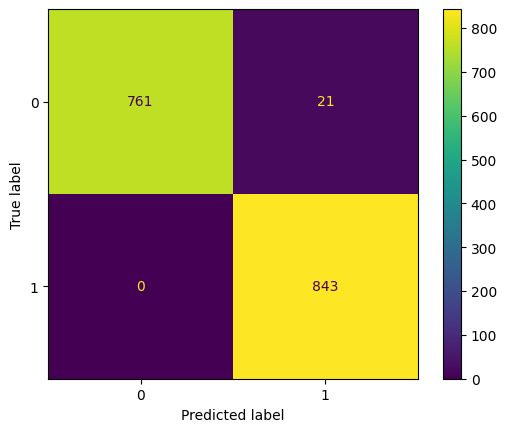

In [9]:
accuracy = accuracy_score(y_val, y_preds)
conf_matix = ConfusionMatrixDisplay(confusion_matrix(y_val, y_preds), display_labels=dtc.classes_)

print("Num of test samples: " + str(len(X_val)))
print(f"Accuracy: {accuracy}")
conf_matix.plot()

In [11]:
n_features = round(math.sqrt(X_train.shape[1]))
rdtc = RandomizedDecisionTreeClassifier(3, max_features=n_features)

start = time.process_time()

rdtc.fit(X_train, y_train)

print(f"Time: {time.process_time() - start}s")

y_preds = rdtc.predict(X_val)

INFO:root:DecisionTreeClassifier(max_depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=21, split_val=1.0, depth=2) created
INFO:root:Node(split_feature=None, split_val=None, depth=2) created
INFO:root:Node(split_feature=2, split_val=4.0, depth=1) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=None, split_val=None, depth=3) created
INFO:root:Node(split_feature=11, split_val=1.0, depth=2) created
INFO:root:Node(split_feature=None, split_val=None, depth=2) created
INFO:root:Node(split_feature=4, split_val=4.25, depth=1) created
INFO:root:Node(split_feature=19, split_val=2.0, depth=0) created


Time: 0.16895719999999947s


Num of test samples: 1625
Accuracy: 0.8609230769230769


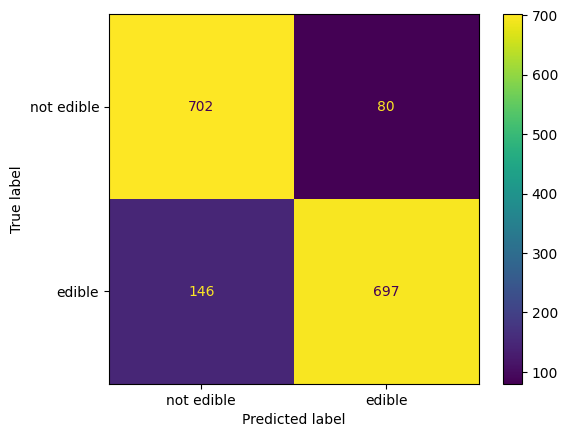

In [13]:
accuracy = accuracy_score(y_val, y_preds)
conf_matix = ConfusionMatrixDisplay(confusion_matrix(y_val, y_preds), display_labels=["not edible", "edible"])

print("Num of test samples: " + str(len(X_val)))
print(f"Accuracy: {accuracy}")
conf_matix.plot()